In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [14]:
df=pd.read_csv("plotting.csv")
df

,Rank,Name,City,Code,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website,lat,lon,State
0,1,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu,42.375100,-71.105616,Massachusetts
1,2,Stanford University,Stanford,CA,Private,8402,17534,13261.0,50134.0,69109,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu,37.426541,-122.170293,California
2,3,Yale University,New Haven,CT,Private,6483,12974,18627.0,50897.0,71290,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu,41.308214,-72.925052,Connecticut
3,4,Massachusetts Institute of Technology,Cambridge,MA,Private,4680,11466,20771.0,43248.0,67430,155200.0,7.0,1490.0,1570.0,33.0,35.0,www.web.mit.edu,42.375100,-71.105616,Massachusetts
4,5,Princeton University,Princeton,NJ,Private,5659,8273,9327.0,48088.0,66150,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu,40.349274,-74.659296,New Jersey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,646,New Mexico State University,Las Cruces,NM,Public,13379,14432,8625.0,9582.0,34720,96700.0,64.0,910.0,1160.0,18.0,23.0,www.nmsu.edu,32.314035,-106.779808,New Mexico
646,647,Indiana State University,Terre Haute,IN,Public,13626,13763,13012.0,9297.0,32938,85600.0,85.0,900.0,1110.0,17.0,23.0,www.indstate.edu,39.466702,-87.413912,Indiana
647,648,Emory &amp; Henry College,Emory,VA,Private,1094,1226,19340.0,27155.0,48100,70700.0,72.0,988.0,1170.0,19.0,25.0,www.ehc.edu,36.772891,-81.836234,Virginia
648,649,Wells College,Aurora,NY,Private,488,516,22828.0,30207.0,55180,NaN,80.0,NaN,NaN,NaN,NaN,www.wells.edu,42.733841,-78.637707,New York


In [15]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this
df["SAT mean"]=(df["SAT Lower"]+df["SAT Upper"])/2

X = df["SAT mean"].values.reshape(-1, 1)
y = df["Acceptance Rate"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (650, 1) (650, 1)


In [16]:
col_data=df.dropna()

In [17]:
col_data

,Rank,Name,City,Code,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,...,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website,lat,lon,State,SAT mean
0,1,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,...,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu,42.375100,-71.105616,Massachusetts,1525.0
1,2,Stanford University,Stanford,CA,Private,8402,17534,13261.0,50134.0,69109,...,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu,37.426541,-122.170293,California,1465.0
2,3,Yale University,New Haven,CT,Private,6483,12974,18627.0,50897.0,71290,...,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu,41.308214,-72.925052,Connecticut,1520.0
3,4,Massachusetts Institute of Technology,Cambridge,MA,Private,4680,11466,20771.0,43248.0,67430,...,7.0,1490.0,1570.0,33.0,35.0,www.web.mit.edu,42.375100,-71.105616,Massachusetts,1530.0
4,5,Princeton University,Princeton,NJ,Private,5659,8273,9327.0,48088.0,66150,...,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu,40.349274,-74.659296,New Jersey,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,645,Morehouse College,Atlanta,GA,Private,2202,2219,34928.0,17318.0,48723,...,74.0,950.0,1160.0,18.0,23.0,www.morehouse.edu,33.748992,-84.390264,Georgia,1055.0
645,646,New Mexico State University,Las Cruces,NM,Public,13379,14432,8625.0,9582.0,34720,...,64.0,910.0,1160.0,18.0,23.0,www.nmsu.edu,32.314035,-106.779808,New Mexico,1035.0
646,647,Indiana State University,Terre Haute,IN,Public,13626,13763,13012.0,9297.0,32938,...,85.0,900.0,1110.0,17.0,23.0,www.indstate.edu,39.466702,-87.413912,Indiana,1005.0
647,648,Emory &amp; Henry College,Emory,VA,Private,1094,1226,19340.0,27155.0,48100,...,72.0,988.0,1170.0,19.0,25.0,www.ehc.edu,36.772891,-81.836234,Virginia,1079.0


In [18]:
col_data.count()

Rank                        523
Name                        523
City                        523
Code                        523
Public/Private              523
Undergraduate Population    523
Student Population          523
Net Price                   523
Average Grant Aid           523
Total Annual Cost           523
Alumni Salary               523
Acceptance Rate             523
SAT Lower                   523
SAT Upper                   523
ACT Lower                   523
ACT Upper                   523
Website                     523
lat                         523
lon                         523
State                       523
SAT mean                    523
dtype: int64

In [21]:
col_data.reset_index(inplace=True)

In [25]:
col_data.drop(["index"],axis=1)

,Rank,Name,City,Code,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,...,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website,lat,lon,State,SAT mean
0,1,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,...,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu,42.375100,-71.105616,Massachusetts,1525.0
1,2,Stanford University,Stanford,CA,Private,8402,17534,13261.0,50134.0,69109,...,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu,37.426541,-122.170293,California,1465.0
2,3,Yale University,New Haven,CT,Private,6483,12974,18627.0,50897.0,71290,...,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu,41.308214,-72.925052,Connecticut,1520.0
3,4,Massachusetts Institute of Technology,Cambridge,MA,Private,4680,11466,20771.0,43248.0,67430,...,7.0,1490.0,1570.0,33.0,35.0,www.web.mit.edu,42.375100,-71.105616,Massachusetts,1530.0
4,5,Princeton University,Princeton,NJ,Private,5659,8273,9327.0,48088.0,66150,...,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu,40.349274,-74.659296,New Jersey,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,645,Morehouse College,Atlanta,GA,Private,2202,2219,34928.0,17318.0,48723,...,74.0,950.0,1160.0,18.0,23.0,www.morehouse.edu,33.748992,-84.390264,Georgia,1055.0
519,646,New Mexico State University,Las Cruces,NM,Public,13379,14432,8625.0,9582.0,34720,...,64.0,910.0,1160.0,18.0,23.0,www.nmsu.edu,32.314035,-106.779808,New Mexico,1035.0
520,647,Indiana State University,Terre Haute,IN,Public,13626,13763,13012.0,9297.0,32938,...,85.0,900.0,1110.0,17.0,23.0,www.indstate.edu,39.466702,-87.413912,Indiana,1005.0
521,648,Emory &amp; Henry College,Emory,VA,Private,1094,1226,19340.0,27155.0,48100,...,72.0,988.0,1170.0,19.0,25.0,www.ehc.edu,36.772891,-81.836234,Virginia,1079.0


# SAT Mean vs Acceptance Rate

In [57]:
# reading values into new_x
X=[]
for i in range(523):
    X.append([col_data["SAT mean"][i],col_data["Acceptance Rate"][i]])

In [58]:
len(X)

523

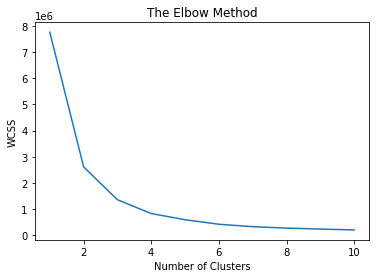

In [59]:
#elbow method to find the number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [67]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 2,
       1, 1, 3, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 3, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,

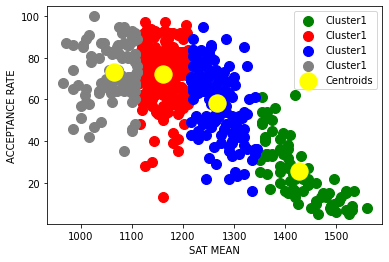

In [107]:
#visualize the clusters(sat mean vs acceptance rate)
color=["green","red","blue","grey"]
for i in range(0,4):
    cluster = [d for b, d in zip(y_kmeans == i, X) if b == True]
    cluster = pd.DataFrame(cluster)
    plt.scatter(cluster[0], cluster[1],s=100,c=color[i],label='Cluster1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1
             ],s=300,c='yellow',label='Centroids')
plt.title('')
plt.xlabel('SAT MEAN')
plt.ylabel('ACCEPTANCE RATE')
plt.legend()
plt.show()

# SAT Mean vs Alumni Salary

In [108]:
X1=[]
for i in range(523):
    X1.append([col_data["SAT mean"][i],col_data["Alumni Salary"][i]])

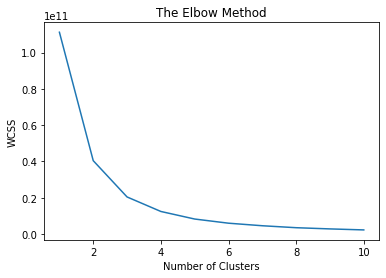

In [110]:
#elbow method to find the number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [111]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X1)

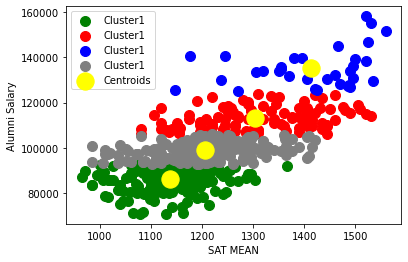

In [112]:
#visualize the clusters(sat mean vs alumni salary)
color=["green","red","blue","grey"]
for i in range(0,4):
    cluster = [d for b, d in zip(y_kmeans == i, X1) if b == True]
    cluster = pd.DataFrame(cluster)
    plt.scatter(cluster[0], cluster[1],s=100,c=color[i],label='Cluster1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1
             ],s=300,c='yellow',label='Centroids')
plt.title('')
plt.xlabel('SAT MEAN')
plt.ylabel('Alumni Salary')
plt.legend()
plt.show()

# Acceptance Rate vs Alumni Salary

In [115]:
X2=[]
for i in range(523):
    X2.append([col_data["Acceptance Rate"][i],col_data["Alumni Salary"][i]])

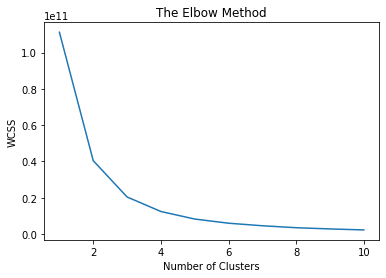

In [116]:
#elbow method to find the number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [117]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X1)

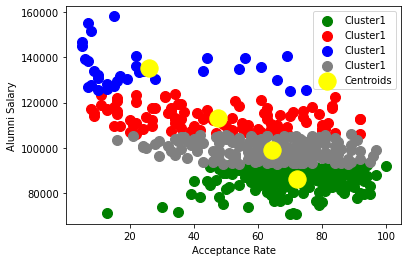

In [119]:
#visualize the clusters(sat mean vs alumni salary)
color=["green","red","blue","grey"]
for i in range(0,4):
    cluster = [d for b, d in zip(y_kmeans == i, X2) if b == True]
    cluster = pd.DataFrame(cluster)
    plt.scatter(cluster[0], cluster[1],s=100,c=color[i],label='Cluster1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1
             ],s=300,c='yellow',label='Centroids')
plt.title('')
plt.xlabel('Acceptance Rate')
plt.ylabel('Alumni Salary')
plt.legend()
plt.show()